<a href="https://colab.research.google.com/github/LazyHooks/ACN_clustering/blob/main/atci_jr_kt_f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [53]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [54]:
import warnings

warnings.filterwarnings('ignore')

input

In [55]:
df = pd.read_csv("ATCI_Junior_KT_Female.csv")

exploratory

In [56]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   External Parity                               180 non-null    int64
 1   Larger Pay Range                              180 non-null    int64
 2   Percentage increase vs absolute pay           180 non-null    int64
 3   Skill differentiation vs job differentiation  180 non-null    int64
 4   Pay Mix Preference                            180 non-null    int64
 5   Base Pay Diff                                 180 non-null    int64
 6   Bonus Pay Diff                                180 non-null    int64
dtypes: int64(7)
memory usage: 10.0 KB


In [57]:
df.head()

,External Parity,Larger Pay Range,Percentage increase vs absolute pay,Skill differentiation vs job differentiation,Pay Mix Preference,Base Pay Diff,Bonus Pay Diff
0,0,1,0,0,2,5,5
1,1,1,1,1,3,1,1
2,0,1,1,1,4,1,1
3,1,0,1,0,4,2,2
4,0,0,0,0,3,4,4


checks

In [58]:
df.isnull().sum()
df.describe()

,External Parity,Larger Pay Range,Percentage increase vs absolute pay,Skill differentiation vs job differentiation,Pay Mix Preference,Base Pay Diff,Bonus Pay Diff
count,180.000000,180.000000,180.000000,180.0000,180.000000,180.000000,180.000000
mean,0.338889,0.422222,0.666667,0.3500,3.361111,3.138889,3.050000
std,0.474652,0.495291,0.472719,0.4783,1.028987,1.310737,1.403408
min,0.000000,0.000000,0.000000,0.0000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.0000,2.000000,2.000000,2.000000
50%,0.000000,0.000000,1.000000,0.0000,4.000000,3.000000,3.000000
75%,1.000000,1.000000,1.000000,1.0000,4.000000,4.000000,4.000000
max,1.000000,1.000000,1.000000,1.0000,5.000000,5.000000,5.000000


In [59]:
X=df

Scaling

In [60]:
cols = X.columns

In [61]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [62]:
X = pd.DataFrame(X, columns=[cols])

In [63]:
X.head()

,External Parity,Larger Pay Range,Percentage increase vs absolute pay,Skill differentiation vs job differentiation,Pay Mix Preference,Base Pay Diff,Bonus Pay Diff
0,0.0,1.0,0.0,0.0,0.25,1.00,1.00
1,1.0,1.0,1.0,1.0,0.50,0.00,0.00
2,0.0,1.0,1.0,1.0,0.75,0.00,0.00
3,1.0,0.0,1.0,0.0,0.75,0.25,0.25
4,0.0,0.0,0.0,0.0,0.50,0.75,0.75


In [64]:
X.dropna(inplace=True)
X

,External Parity,Larger Pay Range,Percentage increase vs absolute pay,Skill differentiation vs job differentiation,Pay Mix Preference,Base Pay Diff,Bonus Pay Diff
0,0.0,1.0,0.0,0.0,0.25,1.00,1.00
1,1.0,1.0,1.0,1.0,0.50,0.00,0.00
2,0.0,1.0,1.0,1.0,0.75,0.00,0.00
3,1.0,0.0,1.0,0.0,0.75,0.25,0.25
4,0.0,0.0,0.0,0.0,0.50,0.75,0.75
...,...,...,...,...,...,...,...
175,1.0,0.0,1.0,1.0,0.75,0.25,0.50
176,0.0,0.0,1.0,1.0,0.75,1.00,0.75
177,1.0,1.0,1.0,0.0,0.75,0.75,0.75
178,1.0,1.0,1.0,1.0,0.50,0.00,0.00


K means

In [65]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [66]:
kmeans.cluster_centers_

array([[ 2.78846154e-01, -1.11022302e-16,  6.53846154e-01,
         4.03846154e-01,  6.12980769e-01,  5.33653846e-01,
         4.92788462e-01],
       [ 4.21052632e-01,  1.00000000e+00,  6.84210526e-01,
         2.76315789e-01,  5.59210526e-01,  5.36184211e-01,
         5.39473684e-01]])

inertia

In [67]:
kmeans.inertia_

172.51252530364377

Elbow

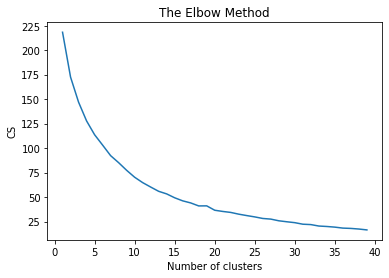

In [68]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

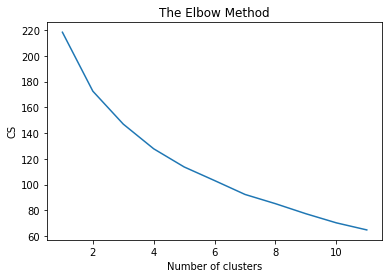

In [69]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [70]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [71]:
labels=kmeans.labels_
print(labels)

[1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0
 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1
 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1
 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0
 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0]


In [72]:
Z=kmeans.cluster_centers_
Z

array([[ 2.78846154e-01, -1.11022302e-16,  6.53846154e-01,
         4.03846154e-01,  6.12980769e-01,  5.33653846e-01,
         4.92788462e-01],
       [ 4.21052632e-01,  1.00000000e+00,  6.84210526e-01,
         2.76315789e-01,  5.59210526e-01,  5.36184211e-01,
         5.39473684e-01]])

In [73]:

#tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
#tsne_scale_results = tsne.fit_transform(X)
#tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
#plt.figure(figsize = (10,10))
#plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
#plt.xlabel('tsne1')
#plt.ylabel('tsne2')
#plt.show()

In [74]:
import matplotlib

In [75]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=2500, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])


[t-SNE] Computing 179 nearest neighbors...
[t-SNE] Indexed 180 samples in 0.000s...
[t-SNE] Computed neighbors for 180 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 180 / 180
[t-SNE] Mean sigma: 0.846926
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.843361
[t-SNE] KL divergence after 2500 iterations: 0.241746


In [76]:
np.unique(labels)


array([0, 1], dtype=int32)

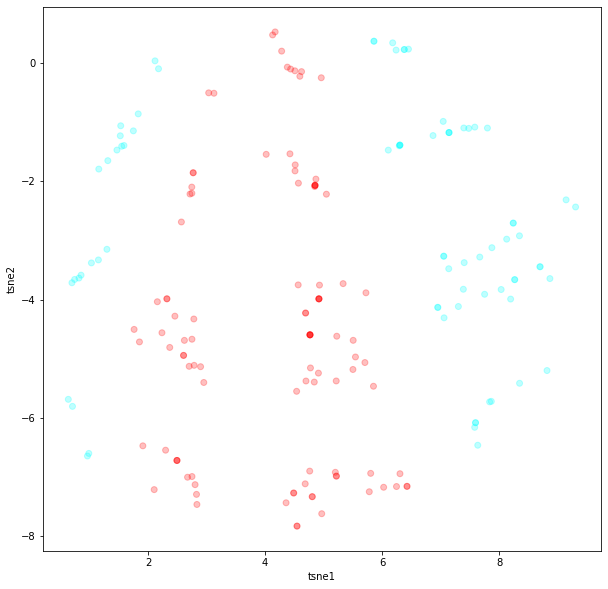

In [77]:
colors = ["red","green","blue","purple","yellow","cyan"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [78]:
Z2 = ms.inverse_transform(Z)
Z2

array([[ 2.78846154e-01, -1.11022302e-16,  6.53846154e-01,
         4.03846154e-01,  3.45192308e+00,  3.13461538e+00,
         2.97115385e+00],
       [ 4.21052632e-01,  1.00000000e+00,  6.84210526e-01,
         2.76315789e-01,  3.23684211e+00,  3.14473684e+00,
         3.15789474e+00]])